In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import tree

## Display Training & Test data (top & bottom five datasets)

In [3]:
#load the csv file
train_data = pd.read_csv('train_data_after_preprocess.csv')
test_data = pd.read_csv('test_data_after_preprocess.csv')

In [4]:
train_data.shape

(63874, 29)

In [5]:
test_data.shape

(9043, 29)

In [6]:
train_data.head()

,housing,loan,default,age_1,age_2,age_3,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,education_tertiary,contact_telephone,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,-0.645275,0.45035,-1.728912,4.961712,-0.420772,0
1,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,-0.538652,0.45035,0.762074,-0.173538,-0.420772,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,-0.369329,0.45035,-0.972209,2.939376,-0.420772,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,-0.077591,0.45035,-1.019112,-0.802554,-0.420772,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,-0.393144,0.45035,0.429922,-0.173538,-0.420772,1


In [7]:
test_data.head()

,housing,loan,default,age_1,age_2,age_3,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,education_tertiary,contact_telephone,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,0
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0
3,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,1


In [8]:
# Creating X,Y test and train data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

### Creating individual base classifiers

In [9]:
random_forest = RandomForestClassifier(n_estimators=25, random_state=1)
logistic_regression = LogisticRegression(C = 0.1, max_iter = 200, penalty = 'l1', solver = 'liblinear')
neural = MLPClassifier(max_iter=1000, random_state=42, alpha = 0.001, hidden_layer_sizes = (100,100))
naive_bayes = GaussianNB()
DT = tree.DecisionTreeClassifier(max_depth = 6)

## 1. Ensemble Method - Gradient Boosting for Classification
#### Gradient Boosting is a powerful ensemble machine learning technique used for both classification and regression tasks. It is a sequential, additive modeling technique that builds an ensemble of weak learners (usually decision trees) to create a strong predictive model. Gradient Boosting is known for its high predictive accuracy and flexibility.

In [22]:
clf = GradientBoostingClassifier().fit(x_train, y_train)
print ('Testing accuracy: ',clf.score(x_test, y_test))

Testing accuracy:  0.7651221939621807


### Hyperparameter Tunning for GradientBoostingClassifier

In [21]:
model = GradientBoostingClassifier(random_state=42)
# Define a smaller search space for hyperparameters
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01],
    'max_depth': [4,5,6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Use RandomizedSearchCV to search through a subset of the hyperparameter space
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10,
                                   scoring='accuracy', cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search to your data
random_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy:.2f}')

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Best Model Accuracy: 0.81
Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 6, 'learning_rate': 0.01}


### Training Performance

In [23]:
model = GradientBoostingClassifier(n_estimators = 200, min_samples_split = 4, min_samples_leaf = 2, max_depth = 6, learning_rate = 0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [43]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.81 0.85 0.87 0.86 0.87 0.87 0.87 0.86 0.87 0.87]
Ten-fold Cross Validation Score= 0.8598


### Testing Performance

Testing Accuracy: 0.8049319915957094
Confusion Matrix:
 [[6410 1575]
 [ 189  869]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      7985
           1       0.36      0.82      0.50      1058

    accuracy                           0.80      9043
   macro avg       0.66      0.81      0.69      9043
weighted avg       0.90      0.80      0.83      9043



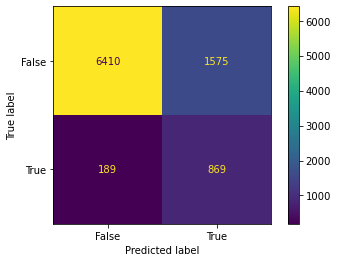

In [26]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## 2. Ensemble Method - AdaBoost
### AdaBoost (Adaptive Boosting) is an ensemble learning technique that combines multiple weak classifiers to create a strong classifier. 

### Model Performance

Training accuracy: 0.869 (+/- 0.0025) Testing accuracy: 0.491 [Decision Tree]
Confusion Matrix:
 [[3542 4443]
 [ 158  900]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.44      0.61      7985
           1       0.17      0.85      0.28      1058

    accuracy                           0.49      9043
   macro avg       0.56      0.65      0.44      9043
weighted avg       0.87      0.49      0.57      9043



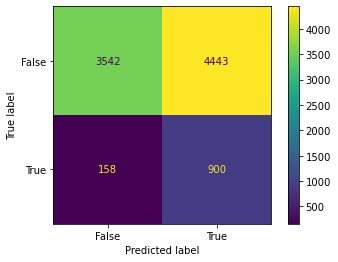

Training accuracy: 0.890 (+/- 0.0050) Testing accuracy: 0.855 [random_forest]
Confusion Matrix:
 [[7125  860]
 [ 450  608]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92      7985
           1       0.41      0.57      0.48      1058

    accuracy                           0.86      9043
   macro avg       0.68      0.73      0.70      9043
weighted avg       0.88      0.86      0.86      9043



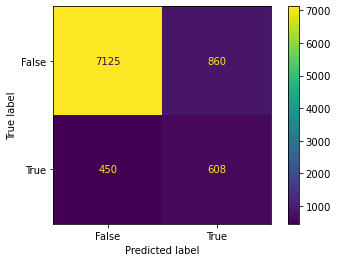

Training accuracy: 0.410 (+/- 0.1613) Testing accuracy: 0.820 [Naive_Bayes]
Confusion Matrix:
 [[7247  738]
 [ 886  172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      7985
           1       0.19      0.16      0.17      1058

    accuracy                           0.82      9043
   macro avg       0.54      0.54      0.54      9043
weighted avg       0.81      0.82      0.81      9043



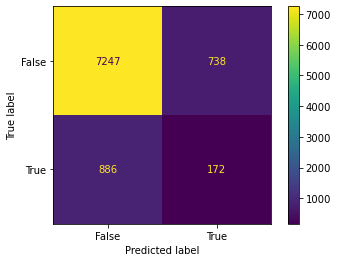

In [35]:
for clf, label in zip([DT, random_forest, naive_bayes], ['Decision Tree','random_forest', 'Naive_Bayes']):
    adaboost_classifier = AdaBoostClassifier(clf,algorithm='SAMME.R')
    adaboost_classifier.fit(x_train, y_train)
    y_pred = adaboost_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores = cross_val_score(adaboost_classifier, x_test, y_test,error_score='raise', scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) Testing accuracy: %0.3f [%s]" % (scores.mean(), scores.std(),accuracy, label))
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print("Confusion Matrix:\n", confusion_matrix)
    print("Classification Report:\n", classification_rep)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

## 3. Ensemble Method - Soft voting classifier

In [10]:
# Soft voting classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('logistic_regression', logistic_regression),
    ('Neural_Network',neural )
], voting='hard')

In [11]:
ensemble_classifier = ensemble_classifier.fit(x_train, y_train)

### Model Performance

In [12]:
for clf, label in zip([random_forest, logistic_regression, neural, ensemble_classifier], ['random_forest', 'logistic_regression', 'Neural_Network', 'ensemble_classifier']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Training accuracy: %0.3f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(),label))
y_pred = ensemble_classifier.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Testing accuracy: %0.3f [Ensemble Classifier]'% accuracy)

Training accuracy: 0.921 (+/- 0.0248) [random_forest]
Training accuracy: 0.836 (+/- 0.0228) [logistic_regression]
Training accuracy: 0.901 (+/- 0.0300) [Neural_Network]
Training accuracy: 0.911 (+/- 0.0262) [ensemble_classifier]
Testing accuracy: 0.851 [Ensemble Classifier]


In [13]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
cv_score = cross_val_score(ensemble_classifier, x_train, y_train, cv=10, scoring = 'accuracy')
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

[0.84 0.90 0.93 0.92 0.92 0.92 0.93 0.92 0.92 0.92]
Ten-fold Cross Validation Score= 0.9109


Testing Accuracy: 0.8508238416454716
Confusion Matrix:
 [[7028  957]
 [ 392  666]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      7985
           1       0.41      0.63      0.50      1058

    accuracy                           0.85      9043
   macro avg       0.68      0.75      0.70      9043
weighted avg       0.88      0.85      0.86      9043



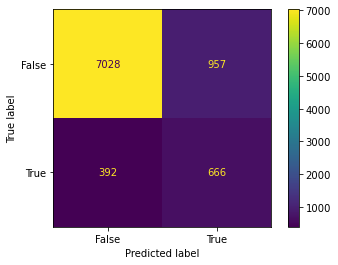

In [14]:
accuracy = accuracy_score(y_test, y_pred)
confusion = metrics.confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Testing Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])
cm_display.plot()
plt.show()